In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

#### Import and Initialize the Class

In [2]:
from scripts.eda import EDA

# Initialize the EDA object
eda = EDA(input_path="../data/raw", output_path="eda_results")


#### Load Data

In [3]:
# Load data
data = eda.load_data(file_name="data.csv")
data.head()

2025-01-28 22:49:18,875 - INFO - Loading data from ../data/raw/data.csv
2025-01-28 22:49:19,046 - INFO - Data loaded successfully.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


#### Dataset Overview

In [4]:
from sklearn.preprocessing import LabelEncoder

### Observations

1. **Shape of the Dataset**:
    - The dataset contains **95,662 rows** and **16 columns**.

2. **Duplicate Rows**:
    - There are **no duplicate rows** in the dataset.

3. **Data Types**:
    - The dataset includes a mix of data types:
      - **Object**: 11 columns (e.g., `TransactionId`, `BatchId`, `AccountId`, etc.)
      - **Integer**: 4 columns (e.g., `CountryCode`, `Value`, `PricingStrategy`, `FraudResult`)
      - **Float**: 1 column (`Amount`)

4. **Memory Usage**:
    - The dataset uses approximately **11.7 MB** of memory.

5. **Non-Null Values**:
    - All columns have **non-null values**.

6. **Unique Values**:
    - Columns like `TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`, `CurrencyCode`, `ProviderId`, `ProductId`, `ProductCategory`, and `ChannelId` have unique values.

### Suggestions

1. **Data Type Conversion**:
    - The `TransactionStartTime` column should be converted from **object** type to **datetime** type for better date-time operations and analysis.
    - Example:
      ```python
      data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
      ```

2. **Handling Negative Values**:
    - The `Amount` column contains negative values which might need to be handled depending on the context of the data.
    - Example:
      ```python
      data['Amount'] = data['Amount'].abs()
      ```

3. **Categorical Encoding**:
    - Columns with object data types might need to be encoded for machine learning models.
    - Example:
      ```python
      label_encoder = LabelEncoder()
      data['TransactionId'] = label_encoder.fit_transform(data['TransactionId'])
      ```

4. **Feature Engineering**:
    - Additional features can be created from the `TransactionStartTime` column such as `Year`, `Month`, `Day`, `Hour`, etc.
    - Example:
      ```python
      data['Year'] = data['TransactionStartTime'].dt.year
      data['Month'] = data['TransactionStartTime'].dt.month
      data['Day'] = data['TransactionStartTime'].dt.day
      data['Hour'] = data['TransactionStartTime'].dt.hour
      ```

2025-01-28 22:49:22,764 - INFO - Dataset Overview:
2025-01-28 22:49:22,882 - INFO - Shape: (95662, 16)
2025-01-28 22:49:22,883 - INFO - Number of duplicate rows: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

from sklearn.preprocessing import LabelEncoder

### Observations

1. **Shape of the Dataset**:
    - The dataset contains **95,662 rows** and **16 columns**.

2. **Duplicate Rows**:
    - There are **no duplicate rows** in the dataset.

3. **Data Types**:
    - The dataset includes a mix of data types:
      - **Object**: 11 columns (e.g., `TransactionId`, `BatchId`, `AccountId`, etc.)
      - **Integer**: 4 columns (e.g., `CountryCode`, `Value`, `PricingStrategy`, `FraudResult`)
      - **Float**: 1 column (`Amount`)

4. **Memory Usage**:
    - The dataset uses approximately **11.7 MB** of memory.

5. **Non-Null Values**:
    - All columns have **non-null values**.

6. **Unique Values**:
    - Columns like `TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`, `CurrencyCode`, `ProviderId`, `ProductId`, `ProductCategory`, and `ChannelId` have unique values.

### Suggestions

1. **Data Type Conversion**:
    - The `TransactionStartTime` column should be converted from **object** type to **datetime** type for better date-time operations and analysis.
    - Example:
      ```python
      data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
      ```
      ```

### Summary Statistics

In [5]:
stats = eda.summary_statistics()

2025-01-28 22:36:21,765 - INFO - Summary Statistics:
2025-01-28 22:36:21,897 - INFO -                         count unique                  top   freq  \
TransactionId           95662  95662  TransactionId_76871      1   
BatchId                 95662  94809        BatchId_67019     28   
AccountId               95662   3633       AccountId_4841  30893   
SubscriptionId          95662   3627  SubscriptionId_3829  32630   
CustomerId              95662   3742      CustomerId_7343   4091   
CurrencyCode            95662      1                  UGX  95662   
CountryCode           95662.0    NaN                  NaN    NaN   
ProviderId              95662      6         ProviderId_4  38189   
ProductId               95662     23          ProductId_6  32635   
ProductCategory         95662      9   financial_services  45405   
ChannelId               95662      4          ChannelId_3  56935   
Amount                95662.0    NaN                  NaN    NaN   
Value                 95662.0 

### Summary Statistics Observations

1. **TransactionId**:
    - Unique values: 95,662

2. **BatchId**:
    - Unique values: 94,809
    - Most frequent value: BatchId_67019 (28 occurrences)

3. **AccountId**:
    - Unique values: 3,633
    - Most frequent value: AccountId_4841 (30,893 occurrences)

4. **SubscriptionId**:
    - Unique values: 3,627
    - Most frequent value: SubscriptionId_3829 (32,630 occurrences)

5. **CustomerId**:
    - Unique values: 3,742
    - Most frequent value: CustomerId_7343 (4,091 occurrences)

6. **CurrencyCode**:
    - Unique values: 1 (UGX)

7. **CountryCode**:
    - Mean: 256.0
    - Standard Deviation: 0.0

8. **ProviderId**:
    - Unique values: 6
    - Most frequent value: ProviderId_4 (38,189 occurrences)

9. **ProductId**:
    - Unique values: 23
    - Most frequent value: ProductId_6 (32,635 occurrences)

10. **ProductCategory**:
    - Unique values: 9
    - Most frequent value: financial_services (45,405 occurrences)

11. **ChannelId**:
    - Unique values: 4
    - Most frequent value: ChannelId_3 (56,935 occurrences)

12. **Amount**:
    - Mean: 6,717.85
    - Standard Deviation: 123,306.80
    - Minimum: -1,000,000.0
    - Maximum: 9,880,000.0

13. **Value**:
    - Mean: 9,900.58
    - Standard Deviation: 123,122.09
    - Minimum: 2.0
    - Maximum: 9,880,000.0

14. **TransactionStartTime**:
    - Mean: 2019-01-02 01:15:52.886433536+00:00
    - Minimum: 2018-11-15 02:18:49+00:00
    - Maximum: 2019-02-13 10:01:28+00:00

15. **PricingStrategy**:
    - Mean: 2.26
    - Standard Deviation: 0.73
    - Minimum: 0.0
    - Maximum: 4.0

16. **FraudResult**:
    - Mean: 0.002
    - Standard Deviation: 0.045
    - Minimum: 0.0
    - Maximum: 1.0

#### Visualize Numerical Features

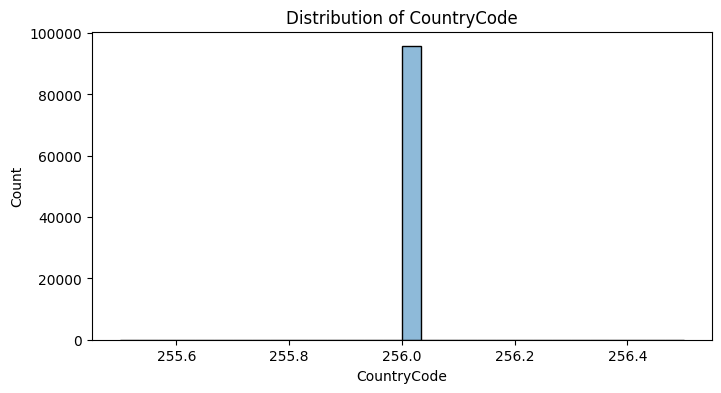

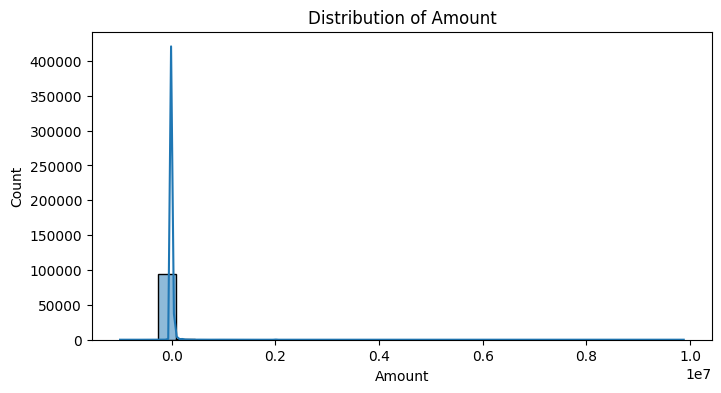

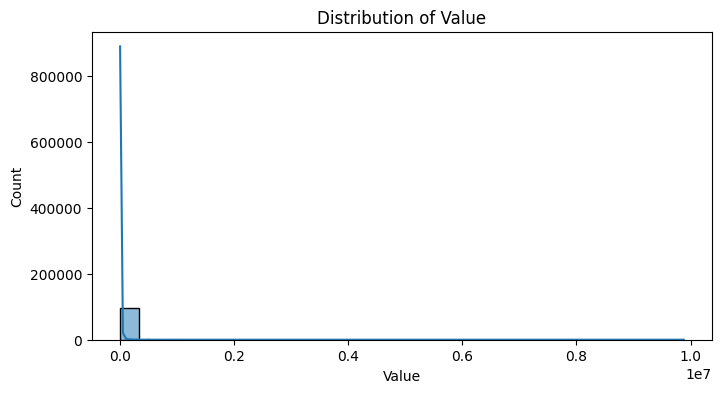

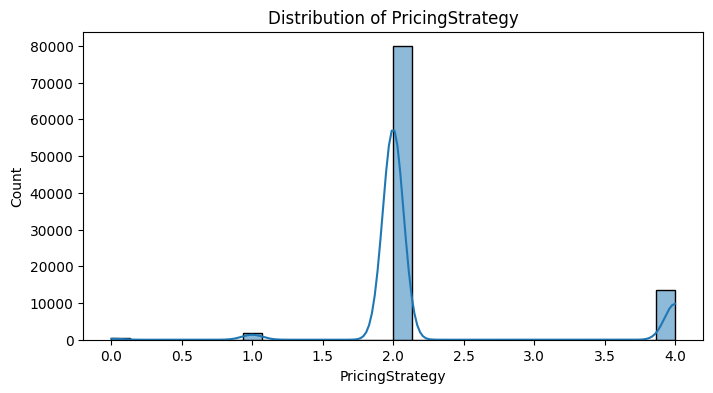

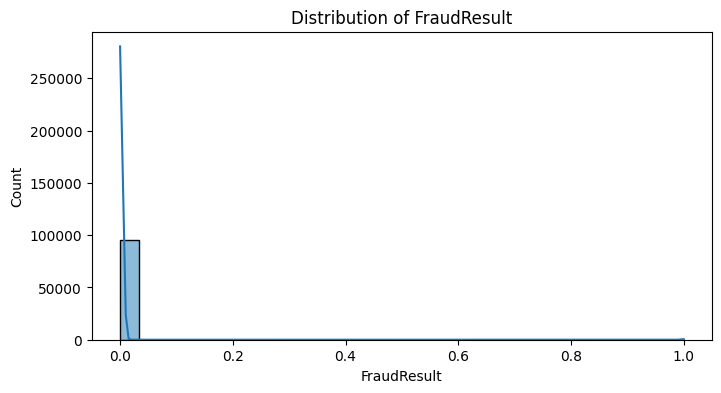

In [7]:
eda.visualize_numerical_distributions()

#### Visualize Categorical Features

2025-01-28 22:40:21,571 - INFO - Skipping column TransactionId with 95662 unique values.
2025-01-28 22:40:21,590 - INFO - Skipping column BatchId with 94809 unique values.
2025-01-28 22:40:21,596 - INFO - Skipping column AccountId with 3633 unique values.
2025-01-28 22:40:21,604 - INFO - Skipping column SubscriptionId with 3627 unique values.
2025-01-28 22:40:21,610 - INFO - Skipping column CustomerId with 3742 unique values.


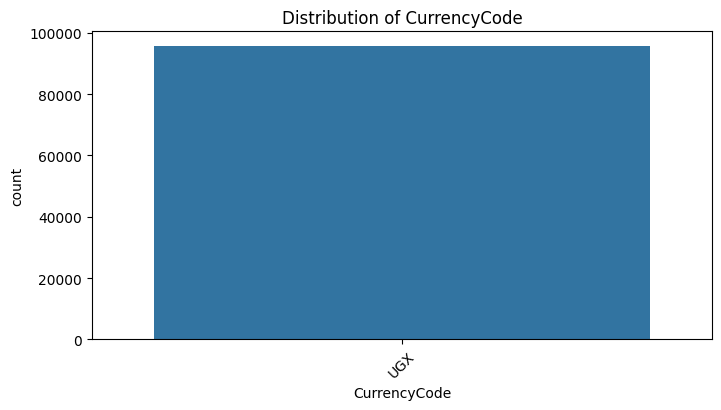

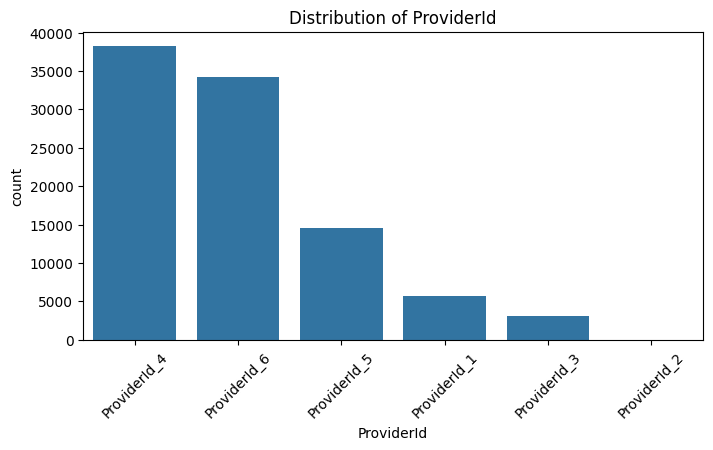

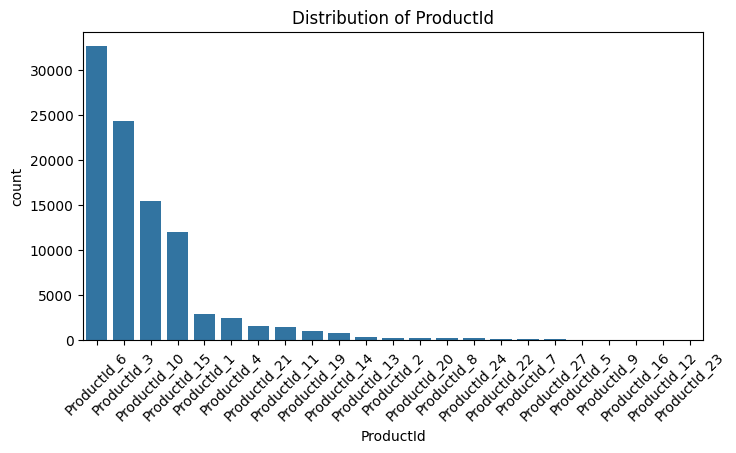

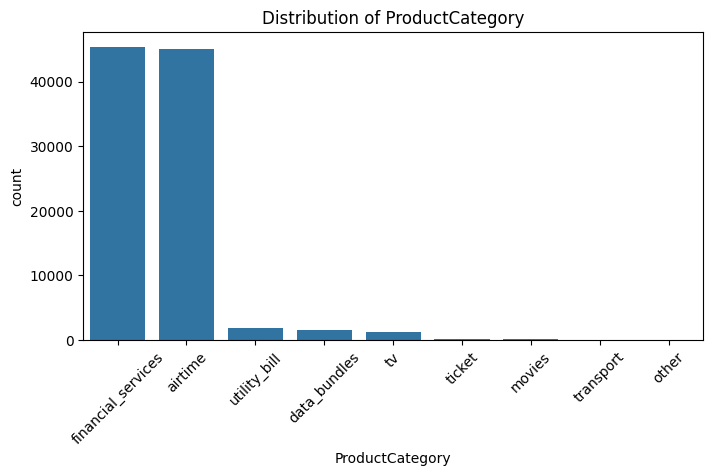

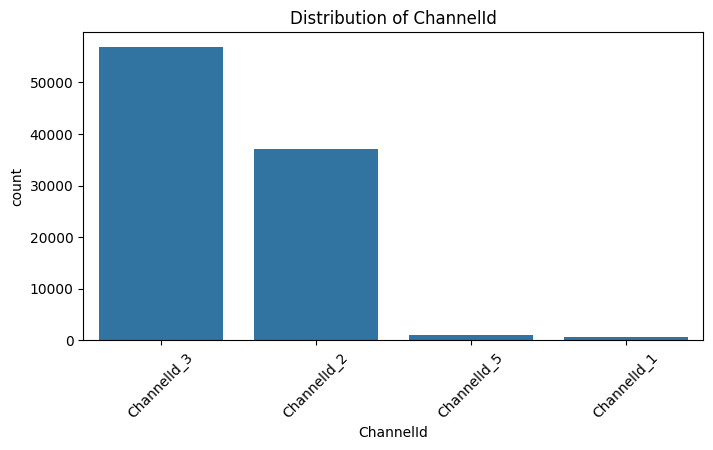

In [9]:
eda.visualize_categorical_distributions()

#### Correlation Analysis

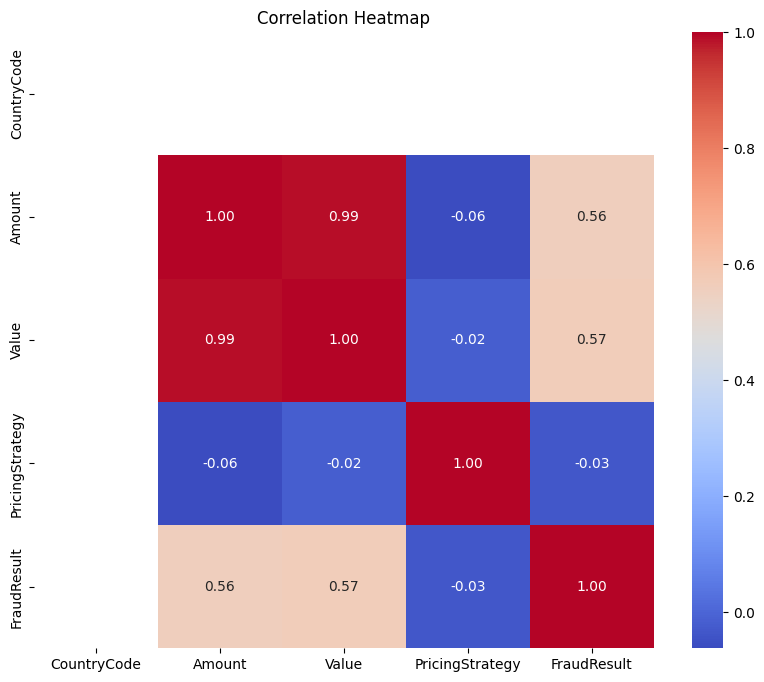

In [10]:
eda.correlation_analysis()

#### Missing Values Analysis

In [11]:
missing = eda.missing_values_analysis()
missing

2025-01-28 22:40:27,444 - INFO - No missing values detected.


Series([], dtype: int64)

#### Outlier Detection

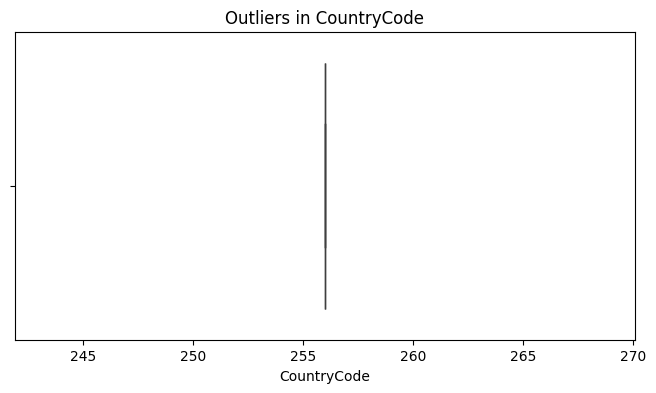

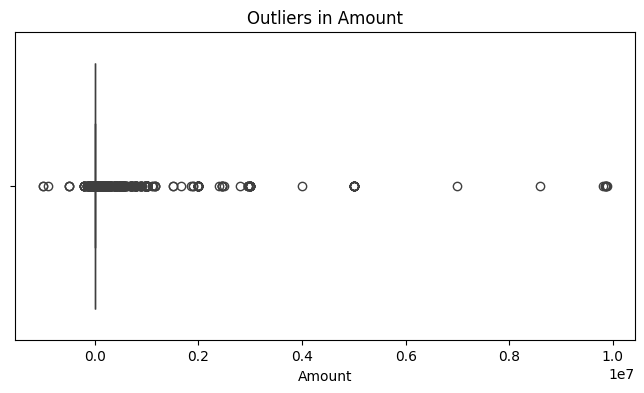

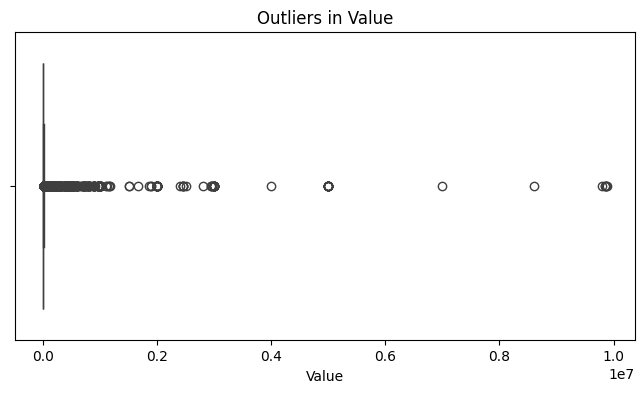

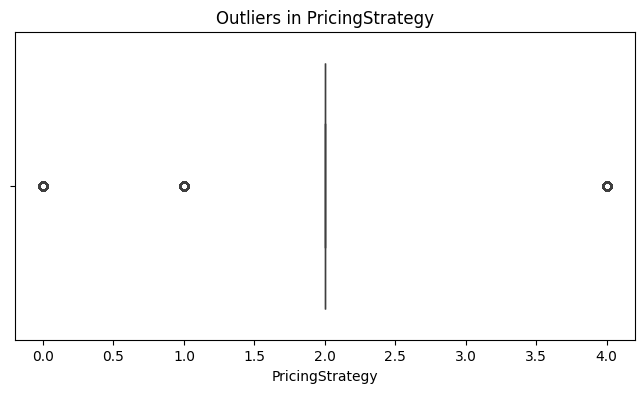

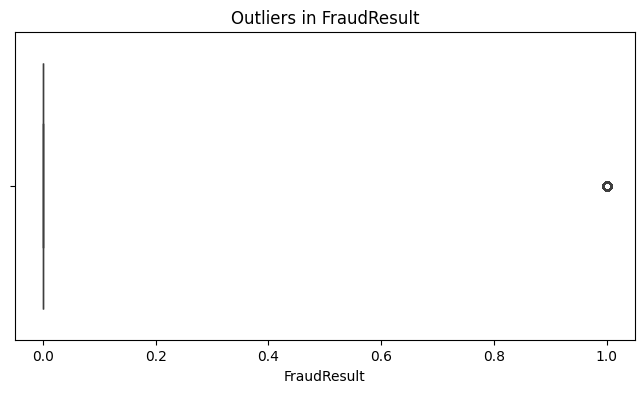

In [13]:
eda.detect_outliers()